In [1]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iris.csv')
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
X = df.iloc[:,0:4]

y = df.iloc[:,4]

In [7]:
X.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, stratify = y, random_state=42 ) # Stratify distributes the classes in the training and testing data equally. 

In [10]:
X_train.shape

(120, 4)

In [11]:
X_test.shape

(30, 4)

In [12]:
y_train.shape

(120,)

In [13]:
y_test.shape

(30,)

In [14]:
y_train.value_counts()

Iris-setosa        40
Iris-virginica     40
Iris-versicolor    40
Name: Species, dtype: int64

In [15]:
y_test.value_counts()

Iris-setosa        10
Iris-virginica     10
Iris-versicolor    10
Name: Species, dtype: int64

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier

clf = LogisticRegression()

# One vs One Multi Classification
ovo = OneVsOneClassifier(clf)
ovo.fit(X_train,y_train)

OneVsOneClassifier(estimator=LogisticRegression())

In [17]:
# One vs Rest Multi Classification
ovr = LogisticRegression(multi_class = 'ovr' )
ovr.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [18]:
y_pred_ovo = ovo.predict(X_test)
y_pred_ovo

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa'],
      dtype=object)

In [19]:
y_pred_ovr = ovr.predict(X_test)
y_pred_ovr

array(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa'],
      dtype=object)

In [20]:
y_pred_ovo_df = pd.DataFrame(y_pred_ovo, columns = ['One Vs One Prediction'])
y_pred_ovo_df.head()

,One Vs One Prediction
0,Iris-setosa
1,Iris-virginica
2,Iris-versicolor
3,Iris-versicolor
4,Iris-setosa


In [21]:
y_pred_ovr_df = pd.DataFrame(y_pred_ovr, columns = ['One Vs Rest Prediction'])
y_pred_ovr_df.head()

,One Vs Rest Prediction
0,Iris-setosa
1,Iris-virginica
2,Iris-versicolor
3,Iris-versicolor
4,Iris-setosa


In [22]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Species
38,Iris-setosa
127,Iris-virginica
57,Iris-versicolor
93,Iris-versicolor
42,Iris-setosa


In [23]:
y_test_df = y_test_df.reset_index(drop= True)
y_test_df.head()

,Species
0,Iris-setosa
1,Iris-virginica
2,Iris-versicolor
3,Iris-versicolor
4,Iris-setosa


In [24]:
result_df = pd.concat([y_pred_ovr_df,y_pred_ovo_df,y_test_df], axis = 1)
result_df

,One Vs Rest Prediction,One Vs One Prediction,Species
0,Iris-setosa,Iris-setosa,Iris-setosa
1,Iris-virginica,Iris-virginica,Iris-virginica
2,Iris-versicolor,Iris-versicolor,Iris-versicolor
3,Iris-versicolor,Iris-versicolor,Iris-versicolor
4,Iris-setosa,Iris-setosa,Iris-setosa
5,Iris-virginica,Iris-versicolor,Iris-versicolor
6,Iris-setosa,Iris-setosa,Iris-setosa
7,Iris-setosa,Iris-setosa,Iris-setosa
8,Iris-virginica,Iris-virginica,Iris-virginica
9,Iris-versicolor,Iris-versicolor,Iris-versicolor


In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_ovo)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]], dtype=int64)

In [26]:
confusion_matrix(y_test, y_pred_ovr)

array([[10,  0,  0],
       [ 0,  8,  2],
       [ 0,  0, 10]], dtype=int64)

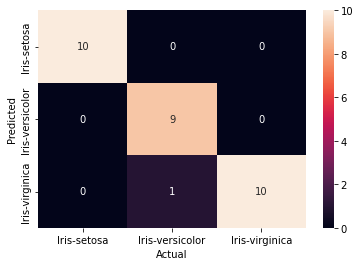

In [27]:
import seaborn as sns

data = {'y_Actual': y_test, 'y_Predicted': y_pred_ovo}

df = pd.DataFrame(data, columns = ['y_Actual','y_Predicted'])

clf_confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames = ['Predicted'], colnames=['Actual'])

sns.heatmap(clf_confusion_matrix, annot=True)
plt.savefig('heatmap.png')

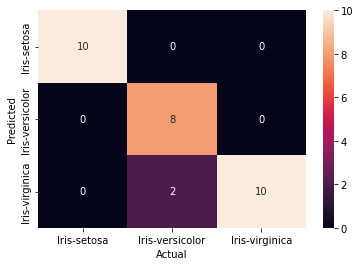

In [28]:
import seaborn as sns

data = {'y_Actual': y_test, 'y_Predicted': y_pred_ovr}

df = pd.DataFrame(data, columns = ['y_Actual','y_Predicted'])

clf_confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames = ['Predicted'], colnames=['Actual'])

sns.heatmap(clf_confusion_matrix, annot=True)
plt.savefig('heatmap2.png')

In [29]:
result_df = pd.concat([y_pred_ovr_df,y_pred_ovo_df,y_test_df], axis = 1)
result_df.to_csv('Predicted Classes Using OVR and OVO Approach.csv')

In [30]:
joblib.dump(ovo, 'one_vs_one_classifier.pkl')

['one_vs_one_classifier.pkl']

In [31]:
from sklearn.metrics import accuracy_score
print("Accuracy= ",accuracy_score(y_test,y_pred_ovo)*100,"%")

Accuracy=  96.66666666666667 %
